# Импорт необходимых модулей

In [1]:
from core.models.Work import Work
from core.solvers.AStar import AStar
from core.solvers.PartialTraversal import PartialTraversal
from core.constants import *

# Инициализация исходных данных по варианту

Таблица с исходными данными по вариантам:

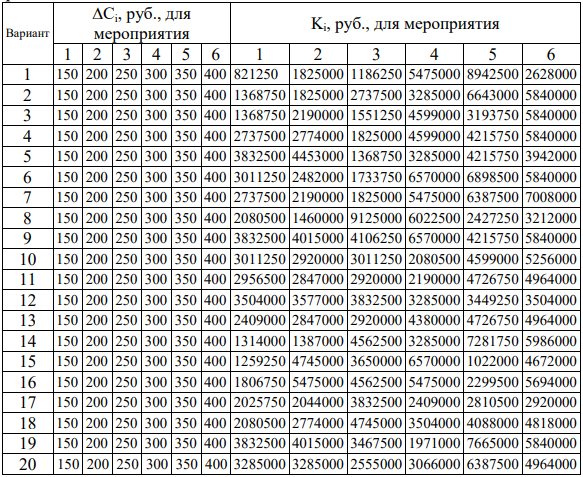

В данной работе выполняется задание по варианту №5

In [2]:
work1 = Work(work_number=6, dc=400, k=3942000, executor="ПМС-219")
work2 = Work(work_number=1, dc=150, k=3832500, executor="ПМС-219")
work3 = Work(work_number=2, dc=200, k=4453000, executor="МСО-9")
work4 = Work(work_number=5, dc=350, k=4215750, executor="МСО-9")
work5 = Work(work_number=3, dc=250, k=1368750, executor="ПМС-219")
work6 = Work(work_number=4, dc=300, k=3285000, executor="МСО-9")

works = [work1, work2, work3, work4, work5, work6]

Набор работ должен удовлетворять следующим ограничениям:

- всего должно быть потрачено не более 12 000 000;
- на работы от предприятия "ПМС-219" должно быть потрачено не менее 3 000 000;
- на работы от предприятия "МСО-9" должно быть потрачено не менее 4 500 000;
- срок окупаемости работ должен быть минимальным

# Поиск оптимальной комбинации работ методом частичного перебора

In [3]:
partial_traversal = PartialTraversal(works)

Построенное методом дерево будет иметь вид:

In [4]:
partial_traversal.show_tree()

- Work 0, Executed: False, T: None, fails: 0
  - Work 6, Executed: True, T: 2.7, fails: 1
    - Work 1, Executed: True, T: 3.9, fails: 1
      - Work 2, Executed: True, T: 4.5, fails: 1
        - Work 5, Executed: False, T: 4.5, fails: 1
      - Work 2, Executed: False, T: 3.9, fails: 1
        - Work 5, Executed: True, T: 3.6, fails: 1
        - Work 5, Executed: False, T: 3.9, fails: 1
          - Work 3, Executed: True, T: 3.1, fails: 1
            - Work 4, Executed: False, T: 3.1, fails: 1
          - Work 3, Executed: False, T: 3.9, fails: 1
            - Work 4, Executed: True, T: 3.6, fails: 1
            - Work 4, Executed: False, T: 3.9, fails: 1
    - Work 1, Executed: False, T: 2.7, fails: 1
      - Work 2, Executed: True, T: 3.8, fails: 1
        - Work 5, Executed: True, T: 3.6, fails: 0
        - Work 5, Executed: False, T: 3.8, fails: 1
          - Work 3, Executed: True, T: 3.1, fails: 1
            - Work 4, Executed: False, T: 3.1, fails: 1
          - Work 3, Execut

Значение `fails` показывает, сколько требований было нарушено (константы, соответствующие требованиям прописаны в файле `constants.py`)

Найдем лучший порядок действий на основании построенного дерева

In [5]:
best_sequence, t = partial_traversal.find_best_sequence()
best_sequence

[Work 4, Executed: True, T: 3.0, fails: 0,
 Work 3, Executed: False, T: 3.0, fails: 1,
 Work 5, Executed: True, T: 3.0, fails: 1,
 Work 2, Executed: False, T: 2.7, fails: 1,
 Work 1, Executed: False, T: 2.7, fails: 1,
 Work 6, Executed: True, T: 2.7, fails: 1,
 Work 0, Executed: False, T: None, fails: 0]

Выберем из полученной ветки необходимый для выполнения список работ

In [6]:
works_to_do = [node.work for node in best_sequence if node.executed]
works_to_do

[Work(work_number=4, dc=300, k=3285000, executor='МСО-9'),
 Work(work_number=5, dc=350, k=4215750, executor='МСО-9'),
 Work(work_number=6, dc=400, k=3942000, executor='ПМС-219')]

Таким образом, нам необходимо выполнить работы под номерами `4`, `5`, `6`

Срок окупаемости в таком случае в годах составит:

In [7]:
t

3.0

Проверим, удовлетворяет ли результат исходным требованиям

In [8]:
actual_spending_by_companies = {key: sum(work.k for work in works_to_do if work.executor == key) 
                                 for key in MINIMAL_SPENDING_BY_COMPANIES}
total_spending = sum(work.k for work in works_to_do)

print(f"Реальные затраты по компаниям:\n\n{actual_spending_by_companies}\n")
print(f"Общие затраты: {total_spending}")

Реальные затраты по компаниям:

{'ПМС-219': 3942000, 'МСО-9': 7500750}

Общие затраты: 11442750


In [9]:
minimal_spending_fits = all(actual_spending_by_companies[key] >= MINIMAL_SPENDING_BY_COMPANIES[key] 
    for key in actual_spending_by_companies.keys() & MINIMAL_SPENDING_BY_COMPANIES.keys())

assert minimal_spending_fits and total_spending <= MAX_MONEY_TO_SPEND
print("При выбранном плане работ все требования соблюдены")

При выбранном плане работ все требования соблюдены


# Поиск оптимальной комбинации работ методом А*

In [10]:
a_star = AStar(works)

Найдем лучший список работ и их срок окупаемости с помощью алгоритма А*

In [11]:
works_to_do, t = a_star.find_best_works_to_do()
works_to_do

[Work(work_number=5, dc=350, k=4215750, executor='МСО-9'),
 Work(work_number=4, dc=300, k=3285000, executor='МСО-9'),
 Work(work_number=6, dc=400, k=3942000, executor='ПМС-219')]

Таким образом, нам необходимо выполнить работы под номерами `5`, `4`, `6`, что совпадает с результатом, полученным методом частичного перебора

Срок окупаемости в таком случае в годах составит:

In [12]:
t

3.0

Поскольку результат совпал с результатом, полученным методом частичного перебора, дальнейшие проверки смысла не имеют, при выбранном плане работ все требования соблюдены